In [1]:
# Import all the package you need to use:

In [2]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import csv
import math
import re

In [3]:
# Define a function to get the file list for 
# each type of data from dataset:

In [4]:
def traindata():
    postrain=glob.glob("hw2_dataset_nb\\hw2_dataset_nb\\train\\pos\\*.txt")
    negtrain=glob.glob("hw2_dataset_nb\\hw2_dataset_nb\\train\\neg\\*.txt")
    return postrain, negtrain
def testdata():
    postest=glob.glob("hw2_dataset_nb\\hw2_dataset_nb\\test\\pos\\*.txt")
    negtest=glob.glob("hw2_dataset_nb\\hw2_dataset_nb\\test\\neg\\*.txt")
    return postest, negtest

In [5]:
# Define a function to read all the files for 
# each category of training data:

In [6]:
def fun(train_list):
    l=[]
    d={}
    
    for i in train_list:
        file=open(i)
        for line in file:
            words=re.split(' |,|-', line)
            for word in words:
                word=word.lower()
                
                if word not in d:
                    d[word] = 0 
                d[word] += 1
                
    
    return(d)
    
p_train, n_train=traindata()#list of file names of positive and negative training data
p_test, n_test=testdata()#list of file names of positive and negative test data


dict_pos=(fun(p_train))#dictionary of positively classified words
dict_neg=(fun(n_train))#dictionary of negatively classified words


In [7]:
# Define a function to calculate the bayes product:

In [8]:
def bayes_product(bow, a):#with Laplace smoothing
    fp=[]
    fn=[]
    i=0
    j=0
    for word in bow:
        
        if (word in dict_pos):
            fp.append(dict_pos[word])
        else:
            fp.append(a)
            
        if (word in dict_neg):
            fn.append(dict_neg[word])
        else:
            fn.append(a)
            
    #print(fn, fp)
    freqpos=np.asarray(fp)
    #print(freqpos)#array of frequencies of positive words of each file in dictionary
    freqneg=np.asarray(fn)
    
    lendict_pos=sum(dict_pos.values())*(1+a)
    #print(lendict_pos)
    lendict_neg=sum(dict_neg.values())*(1+a)
    #print(lendict_neg)
    probpos=(np.log(freqpos/lendict_pos)).sum()+math.log(0.5)
    #print(probpos)
    
    probneg=(np.log(freqneg/lendict_neg)).sum()+math.log(0.5)
    #print(probneg)
    return probpos, probneg

In [9]:
# Define a function to test the naive bayes classifier:

In [10]:
def bow_file(testfile):#returns bag of words for each test file
    d={}
    bow=[]
    file=open(testfile)
    for line in file:
        words=re.split(' |,|-', line)
        for word in words:
            word=word.lower()
            if word not in bow:
                bow.append(word)   
    
    return(bow)

In [11]:
def classifier(files, a):
    tag=[]
    for file in files:
        bow=bow_file(file)
        prob_pos, prob_neg=bayes_product(bow, a)
        if(prob_pos>prob_neg):
            tag.append(1)
        else:
            tag.append(0)
    return tag  #a list of 1s and 0s for positive and negative respectively

In [12]:
# Initialize the alpha
# Get the whole data list for different types of data
# Read and save all the data from dataset
# Find the positive accuracy and negative accuracy

In [13]:
a=1
tagpos=classifier(p_test,a)
tagneg=classifier(n_test,a)
lpos=np.asarray(tagpos)
lneg=np.asarray(tagneg)
true_positive=lpos.sum()
false_negative=len(lpos)-true_positive
false_positive=lneg.sum()
true_negative=len(lneg)-false_positive
accuracy=(true_positive+true_negative)*100/(len(lpos)+len(lneg))
print('The accuracy for alpha is 1 is: ', accuracy)


The accuracy for alpha is 1 is:  82.556


In [14]:

from astropy.table import Table
a = ['Positive class', 'Negative class']
b = [true_positive, false_positive]
c = [false_negative,true_negative]
t = Table([a, b, c], names=('Con matrix', 'True', 'False'))
print('The confusion matrix is:')
confusion=np.array([[true_negative, false_positive],[false_negative, true_positive]])
print(np.array([['True Negative', 'False positive'],['False Negative', 'True_positive']]))
print(confusion)

The confusion matrix is:
[['True Negative' 'False positive']
 ['False Negative' 'True_positive']]
[[11140  1360]
 [ 3001  9499]]


In [15]:
alpha=[0.0001,0.001, 0.01,0.1, 1, 10, 100, 1000]
l=[]
for a in alpha:
    
    v=a
    tagpos=classifier(p_test,v)
    tagneg=classifier(n_test,v)
    lpos=np.asarray(tagpos)
    lneg=np.asarray(tagneg)
    true_positive=lpos.sum()
    false_positive=len(lpos)-true_positive
    false_negative=lneg.sum()
    true_negative=len(lneg)-false_negative
    accuracy=(true_positive+true_negative)*100/(len(lpos)+len(lneg))
    l.append(accuracy)
    


print(l)




[76.64, 78.28, 79.864, 81.54, 82.556, 81.876, 79.812, 76.592]


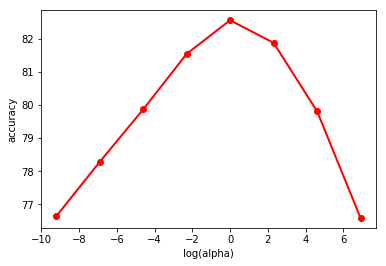

In [16]:
import matplotlib.pyplot as plt
l1=np.asarray(l)
a=np.array(alpha)
a1=np.log(a)
plt.plot(a1, l1, linewidth=2,marker='o', color='r')
plt.xlabel('log(alpha)')
plt.ylabel('accuracy')
plt.show()

In [ ]:
Alpha is the laplace smoothing factor.
Very high alpha means high weightage to a word not existing in the 
dictionary before. Less weightage is given to existing words frequency and hence they
will have similar probabilities irrespective. This is wrong because more weightage should
be given to existing words.

Low alpha means low weightage to a new word not existing in the dictionary. This leads to 
a less accurate classification.